We have worked on various models and used them to predict the output. Here is one such model that is MLP which is an important model of Artificial Neural Network and can be used as Regressor and Classifier.

So this is the recipe on how we can use MLP Classifier and Regressor in Python.

### Step 1 - Import the library

In [1]:

from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

We have imported all the modules that would be needed like metrics, datasets, MLPClassifier, MLPRegressor etc. We will see the use of each modules step by step further.

### Step 2 - Setting up the Data for Classifier

We have imported inbuilt wine dataset from the module datasets and stored the data in X and the target in y. We have also used train_test_split to split the dataset into two parts such that 20% of data is in test and rest in train.

In [2]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Step 3 - Using MLP Classifier and calculating the scores

We have made an object for thr model and fitted the train data. Then we have used the test data to test the model by predicting the output from the model for test data.

In [3]:
model = MLPClassifier()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPClassifier()


Now We are calcutaing other scores for the model using classification_report and confusion matrix by passing expected and predicted values of target of test set.

In [4]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89        18
           2       0.86      0.86      0.86         7

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36

[[10  1  0]
 [ 1 16  1]
 [ 0  1  6]]


### Step 4 - Setting up the Data for Regressor

We have imported inbuilt boston dataset from the module datasets and stored the data in X and the target in y. We have also used train_test_split to split the dataset into two parts such that 20% of data is in test and rest in train.

In [5]:
dataset = datasets.load_boston()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Step 5 - Using MLP Regressor and calculating the scores

We have made an object for thr model and fitted the train data. Then we have used the test data to test the model by predicting the output from the model for test data.

In [6]:
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPRegressor()


Now We are calcutaing other scores for the model using r_2 score and mean_squared_log_error by passing expected and predicted values of target of test set.

In [7]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.42358809196169234
0.07582398617218641


### Step 6 - Ploting the model

We are ploting the regressor model:

<AxesSubplot:>

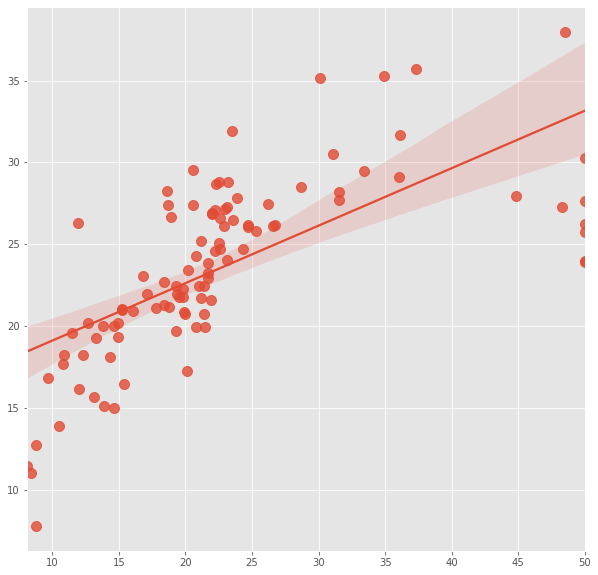

In [8]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### Multi-Layer Perceptron

Multi-Layer Perceptron is a supervised machine learning algorithm.



#### 1. Import the Libraries

In [9]:
from sklearn.neural_network import MLPRegressor
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#### 2. Import the Dataset

We are downloading the Boston Housing Price Regression dataset for our model.

In [10]:
X, y = load_boston(return_X_y=True)

#### 3. Explore the Dataset

In [11]:
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [12]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

#### 4. Splitting the Dataset  

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


#### 5. Model Implementation and Fitting                                               


In [14]:
mlpregressor = MLPRegressor(random_state=1, max_iter=400)
mlpregressor.fit(X_train,y_train)
mlpregressor

MLPRegressor(max_iter=400, random_state=1)

#### 6. Model Prediction

In [15]:
predictions=mlpregressor.predict(X_test)
predictions

array([22.98590599, 26.85210135, 28.19341946, 11.36833404, 19.76170987,
       21.05022462, 20.38329315, 24.75104525, 15.6650094 , 11.7607584 ,
        7.00129694, 11.57951969, 13.86840468,  9.14836934, 44.93472578,
       28.1825055 , 21.19179813, 34.7582846 , 29.67114252, 23.93123907,
       24.72872738, 22.07983311, 18.83739929, 26.94685883, 23.10271824,
       14.40326144, 18.81388947, 14.54947939, 34.02607963, 19.99919817,
       14.07133033, 17.89125991, 18.39711904, 19.70028388, 26.47712789,
       20.73149504, 10.05206676, 28.41801917, 12.10760056, 12.19924167,
       24.50427948, 21.21484305, 20.70212926, 13.0034517 , 24.47657434,
       25.07390979, 18.01002706, 21.28253753, 14.10718995, 22.75944379,
       14.31106996, 18.80882122, 19.36178619, 30.18192265, 10.90096877,
       17.66765956, 19.30384078, 18.33937898, 11.34805735, 21.2948595 ,
       25.53445081, 19.25726242, 28.62822843, 30.64281438, 16.30623628,
       32.84175164, 15.4210372 , 17.25693685, 13.87938571, 22.30

#### 7. Hyper Parameter Tuning        

We can calculate the best parameters for the model using “GridSearchCV”. The input parameters 
for the GridSearchCV method are
 
1. The MLP model
2. A parameter dictionary in which we define various hidden layers, activation units, learning rates.

It trains the model and finds the best parameter.

In [16]:
check_parameters = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [17]:
gridsearchcv = GridSearchCV(mlpregressor, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=400, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [18]:
gridsearchcv = GridSearchCV(mlpregressor, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=400, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [19]:
print('Best parameters found:\n', gridsearchcv.best_params_)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
